In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

#First specifying the path to the CSV files containing each station's data
trainpath = 'C:/Users/we19383/DataspellProjects/MLP_coursework/morebikes2022/Train/'
testpath = 'C:/Users/we19383/DataspellProjects/MLP_coursework/morebikes2022/test.csv'

phase1_files = sorted([i for i in os.listdir(trainpath) if i.endswith('deploy.csv')])
dfs = []

for file in phase1_files:
    csv_filepath = os.path.join(trainpath, file)
    df = pd.read_csv(csv_filepath)
    dfs.append(df)
    
train = pd.concat(dfs, ignore_index=True)

test_filepath = os.path.join(testpath)
test = pd.read_csv(test_filepath)

PHASE 1

I will start by training a single model on all the stations together. 

In [2]:
train

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekday,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
0,201,39.478178,-0.383541,27,1.412114e+09,2014,10,1,0,Wednesday,...,21.3,85.0,855.3,0.0,NaN,NaN,NaN,NaN,NaN,1.0
1,201,39.478178,-0.383541,27,1.412118e+09,2014,10,1,1,Wednesday,...,21.1,86.0,1000.6,0.0,NaN,NaN,NaN,NaN,NaN,0.0
2,201,39.478178,-0.383541,27,1.412122e+09,2014,10,1,2,Wednesday,...,20.9,86.0,880.6,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,201,39.478178,-0.383541,27,1.412125e+09,2014,10,1,3,Wednesday,...,20.4,88.0,859.8,0.0,1.0,NaN,NaN,NaN,NaN,0.0
4,201,39.478178,-0.383541,27,1.412129e+09,2014,10,1,4,Wednesday,...,20.3,87.0,898.1,0.0,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55870,275,39.450273,-0.333363,15,1.414778e+09,2014,10,31,19,Friday,...,20.2,80.0,1023.5,0.0,15.0,-0.50,7.00,-0.50,7.00,15.0
55871,275,39.450273,-0.333363,15,1.414782e+09,2014,10,31,20,Friday,...,20.2,82.0,1023.9,0.0,15.0,1.75,8.75,1.75,8.75,15.0
55872,275,39.450273,-0.333363,15,1.414786e+09,2014,10,31,21,Friday,...,20.0,83.0,1024.0,0.0,15.0,3.25,10.50,3.25,10.50,15.0
55873,275,39.450273,-0.333363,15,1.414789e+09,2014,10,31,22,Friday,...,19.3,84.0,1024.4,0.0,15.0,3.00,10.00,3.00,10.00,15.0


In [3]:
test

,Id,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,...,windDirection.grades,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes
0,1,201,39.478178,-0.383541,27,1415149200,2014,11,5,2,...,202.5,12.1,62,1002.6,0.0,1,-2.000000,2.200000,-2.00,2.75
1,2,201,39.478178,-0.383541,27,1415469600,2014,11,8,19,...,202.5,17.2,43,1011.2,0.0,0,0.800000,4.400000,-0.25,4.00
2,3,201,39.478178,-0.383541,27,1415714400,2014,11,11,15,...,135.0,11.8,89,1004.0,0.0,15,-7.200000,3.800000,-8.00,4.50
3,4,201,39.478178,-0.383541,27,1415919600,2014,11,14,0,...,202.5,19.3,64,1010.5,0.0,3,0.166667,2.333333,1.75,3.50
4,5,201,39.478178,-0.383541,27,1416254400,2014,11,17,21,...,112.5,14.4,52,1011.6,0.0,0,1.166667,2.333333,2.25,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,2246,275,39.450273,-0.333363,15,1421301600,2015,1,15,7,...,157.5,8.2,73,1020.9,0.0,14,-2.733333,9.333333,-0.50,10.00
2246,2247,275,39.450273,-0.333363,15,1421539200,2015,1,18,1,...,157.5,6.8,51,1021.4,0.0,13,0.400000,10.866667,0.50,8.25
2247,2248,275,39.450273,-0.333363,15,1421859600,2015,1,21,18,...,180.0,10.8,53,1006.7,0.0,7,0.937500,8.187500,0.50,10.00
2248,2249,275,39.450273,-0.333363,15,1422061200,2015,1,24,2,...,202.5,6.9,45,1021.0,0.0,14,0.812500,11.812500,0.75,10.75


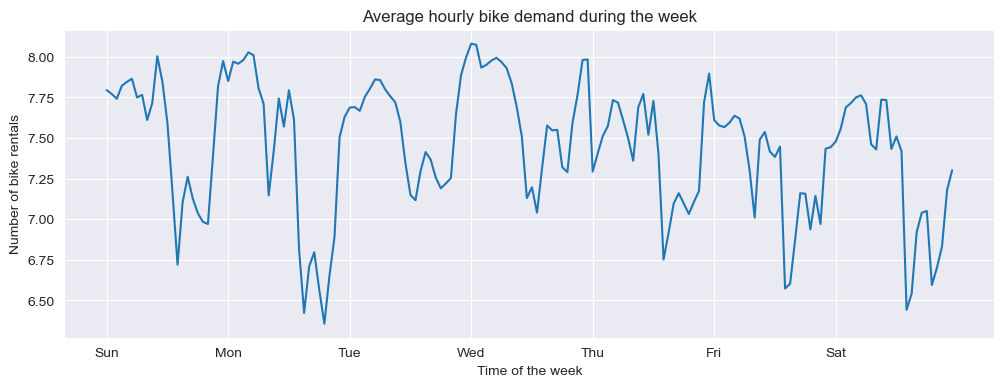

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = train.groupby(["weekday", "hour"])["bikes"].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

The first thing to do before carrying out any predictive modelling is time-based cross validation. The initial split value is 10 by convention. The training set size is kept relatively small to ensure stable cross-validation.

In [5]:
ts_cv = TimeSeriesSplit(n_splits = 10,
                        gap = 48,
                        max_train_size = 10000,
                        test_size=1000
                        )


In [6]:
cdf = pd.concat([train, test]) #Combined data-frame of train and test values

cdf = cdf.drop('weekday', axis=1)
cdf = cdf.fillna(cdf.median())

X = cdf.drop('bikes', axis=1)
y = cdf['bikes']/cdf['bikes'].max()

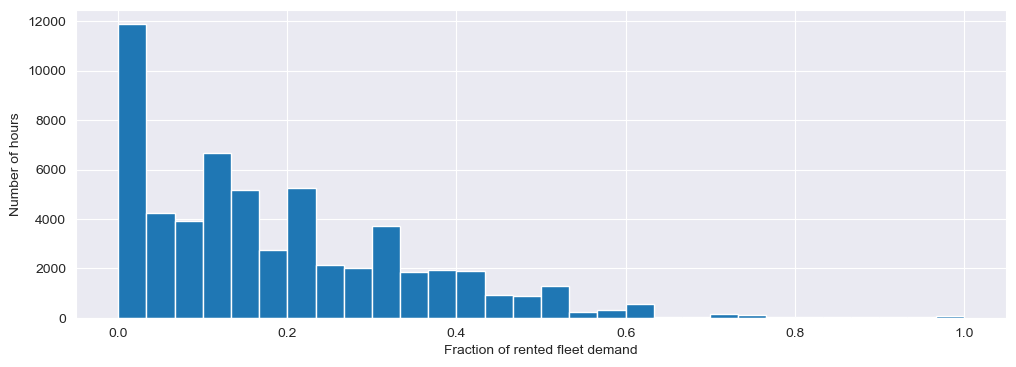

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel="Fraction of rented fleet demand",
    ylabel="Number of hours",
)

By inspection the above methods have split the dataset correctly. Now it's time to implement various linear models on the cross-validated data.

In [8]:
#The first model that we'll be using is a linear regression model. Best to start simple and get more complex as I go on.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

lin_reg = LinearRegression()

def all_stations(model, X, y, cv):
    """This function evaluates the mean absolute error and root-mean-square error for the bik rental data set, based on the cross validation split and model given"""
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error for {model}:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error for {model}: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )
    



all_stations(lin_reg, X, y, cv=ts_cv)

Mean Absolute Error for LinearRegression():     0.237 +/- 0.517
Root Mean Squared Error for LinearRegression(): 0.455 +/- 1.113


C:\Users\we19383\AppData\Local\Temp\ipykernel_16464\4291428516.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


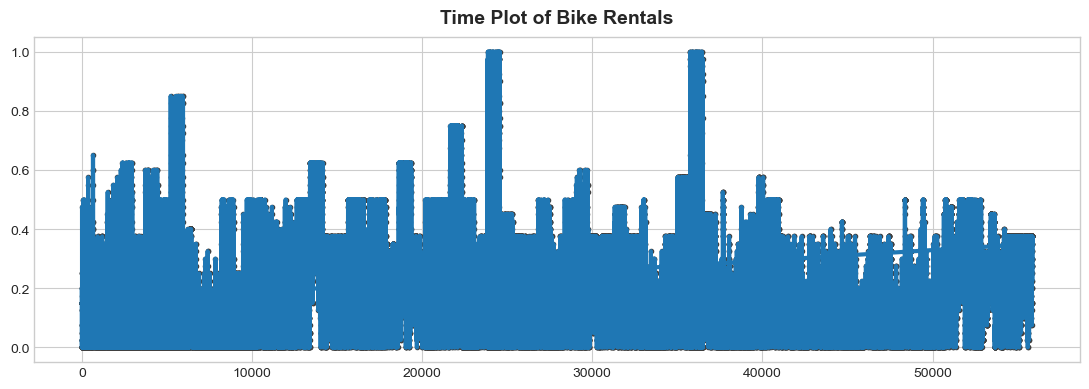

In [9]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

ax = y.plot(**plot_params)
ax = y.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Bike Rentals');

In [10]:
from sklearn.linear_model import BayesianRidge

Bayes_Rid = BayesianRidge()

all_stations(Bayes_Rid, X, y, cv=ts_cv)

Mean Absolute Error for BayesianRidge():     0.063 +/- 0.027
Root Mean Squared Error for BayesianRidge(): 0.083 +/- 0.031


In [11]:
from sklearn.ensemble import HistGradientBoostingRegressor

HGB = HistGradientBoostingRegressor()

all_stations(HGB, X, y, cv=ts_cv)

Mean Absolute Error for HistGradientBoostingRegressor():     0.051 +/- 0.011
Root Mean Squared Error for HistGradientBoostingRegressor(): 0.070 +/- 0.018


Having trained multiple models on all stations together, now I will train a separate model for each station

In [12]:
X['station']

0       201
1       201
2       201
3       201
4       201
       ... 
2245    275
2246    275
2247    275
2248    275
2249    275
Name: station, Length: 58125, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Assuming X is your dataset

cv_stat = TimeSeriesSplit(n_splits=5, gap=48, max_train_size=250, test_size=10)

def station_models(model):
    """This function will iterate over each unique station ID and apply a selected model to each station. It will then store the MAE and RMSE for each station, in a dictionary."""

    station_maes = []  # List to store MAE values for each station
    station_rmses = []

    stations = X['station']
    for station in stations.unique():
        # data for the current station
        station_data = X[X['station'] == station]

        feat = station_data[['day', 'weekhour']]
        targ = station_data['bikes_3h_ago'] / station_data['bikes_3h_ago'].max()

        X_train, X_test, y_train, y_test = train_test_split(feat, targ, test_size=0.2, random_state=42)

        # create and fit a model
        #model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on test_set
        predictions = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, predictions)
        rmse = mean_squared_error(y_test, predictions, squared=False)

        # print(f"This is the mean absolute error for station {station}: {mae:.3f}")
        # print(f"This is the root mean squared error for station {station}: {rmse:.3f}")

        # Store MAE for each station
        station_maes.append(mae)
        station_rmses.append(rmse)

    # Calculate and print the average MAE
    average_mae = np.mean(station_maes)
    average_rmse = np.mean(station_rmses)
    print(f"\nAverage MAE across all stations for {model}: {average_mae:.3f} +/- {average_mae.std():.3f}\n")
    print(f"\nAverage RMSE across all stations for {model}: {average_rmse:.3f} +/- {average_rmse.std():.3f}\n")

# Assuming Bayes_Rid is defined somewhere
station_models(lin_reg)
station_models(Bayes_Rid)
station_models(HGB)



Average MAE across all stations for LinearRegression(): 0.222 +/- 0.000


Average RMSE across all stations for LinearRegression(): 0.265 +/- 0.000

Average MAE across all stations for BayesianRidge(): 0.222 +/- 0.000


Average RMSE across all stations for BayesianRidge(): 0.265 +/- 0.000

Average MAE across all stations for HistGradientBoostingRegressor(): 0.104 +/- 0.000


Average RMSE across all stations for HistGradientBoostingRegressor(): 0.142 +/- 0.000


In [14]:
X.head()

,station,latitude,longitude,numDocks,timestamp,year,month,day,hour,weekhour,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,Id
0,201,39.478178,-0.383541,27,1.412114e+09,2014,10,1,0,49,...,21.3,85.0,855.3,0.0,6.0,0.0,6.25,0.0,6.25,1125.5
1,201,39.478178,-0.383541,27,1.412118e+09,2014,10,1,1,50,...,21.1,86.0,1000.6,0.0,6.0,0.0,6.25,0.0,6.25,1125.5
2,201,39.478178,-0.383541,27,1.412122e+09,2014,10,1,2,51,...,20.9,86.0,880.6,0.0,6.0,0.0,6.25,0.0,6.25,1125.5
3,201,39.478178,-0.383541,27,1.412125e+09,2014,10,1,3,52,...,20.4,88.0,859.8,0.0,1.0,0.0,6.25,0.0,6.25,1125.5
4,201,39.478178,-0.383541,27,1.412129e+09,2014,10,1,4,53,...,20.3,87.0,898.1,0.0,0.0,0.0,6.25,0.0,6.25,1125.5


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate

cv_ts = TimeSeriesSplit(n_splits = 5,
                          gap = 48,
                          max_train_size = 250,
                          test_size=10
                          )

def station_models_ts_cv(model):
    """This function will iterate over each unique station ID and apply a selected model to each station. It will then store the MAE and RMSE for each station, in a dictionary."""

    station_models = {} #this dictionary will store individual models for each station

    station_maes = []
    station_rmses = []
    
    stations = X['station']
    for station in stations.unique():
        #data for the current station
        station_data = X[X['station'] == station]


        #Extract feature and target variable
        feat = station_data[['full_profile_bikes', 'latitude']]
        targ = station_data['bikes_3h_ago']/station_data['bikes_3h_ago'].max()

        cv_scores = cross_validate(model, feat, targ, cv=cv_ts, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])

        # Convert scores to positive values and calculate the mean
        mae = -cv_scores["test_neg_mean_absolute_error"]
        rmse = -cv_scores["test_neg_root_mean_squared_error"]

        # print(
        #     f"Average Mean Absolute Error for station {station}:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        #     f"Average Root Mean Squared Error for station {station}: {rmse.mean():.3f} +/- {rmse.std():.3f}"
        # )
        station_maes.append(mae)
        station_rmses.append(rmse)
    # Calculate and print the average MAE
    average_mae = np.mean(station_maes)
    average_rmse = np.mean(station_rmses)
    print(f"\nAverage MAE across all stations between 201-275 for {model}: {average_mae:.3f}")
    print(f"\nAverage RMSE across all stations for {model}: {average_rmse:.3f}")

station_models_ts_cv(lin_reg)
station_models_ts_cv(Bayes_Rid)
station_models_ts_cv(HGB)


Average MAE across all stations between 201-275 for LinearRegression(): 0.235

Average RMSE across all stations for LinearRegression(): 0.273

Average MAE across all stations between 201-275 for BayesianRidge(): 0.236

Average RMSE across all stations for BayesianRidge(): 0.273

Average MAE across all stations between 201-275 for HistGradientBoostingRegressor(): 0.241

Average RMSE across all stations for HistGradientBoostingRegressor(): 0.282


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Assuming X is your dataset

cv_stat = TimeSeriesSplit(n_splits=5, gap=48, max_train_size=250, test_size=10)

def predict_bikes(model):
    """This function will iterate over each unique station ID and apply a selected model to each station. It will then predict the number of bikes for each station"""

    station_maes = []  # List to store MAE values for each station
    station_rmses = []
    predictions_list = []
    stations = cdf['station']
    for station in test['station'].unique():
        # data for the current station
        station_data = cdf[cdf['station'] == station]

        feat = station_data[['day', 'weekhour']]
        targ = station_data['bikes']

        X_train, X_test, y_train, y_test = train_test_split(feat, targ, test_size=30, random_state=42)

        # create and fit a model
        #model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on test_set
        predictions = model.predict(X_test)

        # Evaluate the model
        mae = mean_absolute_error(y_test, predictions)
        rmse = mean_squared_error(y_test, predictions, squared=False)

        # print(f"This is the mean absolute error for station {station}: {mae:.3f}")
        # print(f"This is the root mean squared error for station {station}: {rmse:.3f}")

        # Store MAE for each station
        station_maes.append(mae)
        station_rmses.append(rmse)
        predictions_list.append(predictions)

    # Calculate and print the average MAE
    average_mae = np.mean(station_maes)
    average_rmse = np.mean(station_rmses)
    predictions_df = pd.DataFrame(predictions_list)
    predictions_df = pd.melt(predictions_df)
    predictions_df = predictions_df.reset_index(drop=True)
    predictions_df = predictions_df.drop(columns=['variable'])
    predictions_df['ID'] = range(1,2251)
    predictions_df.rename(columns={'value': 'bikes'}, inplace=True)
    pd.set_option('display.max_rows', None)
    # print(f"\nAverage MAE across all stations for {model}: {average_mae:.3f}")
    # print(f"\nAverage RMSE across all stations for {model}: {average_rmse:.3f}")
    print(predictions_df)
    
# Assuming Bayes_Rid is defined somewhere
predict_bikes(lin_reg)
#predict_bikes(Bayes_Rid)
#predict_bikes(HGB)


          bikes    ID
0      4.055654     1
1      3.831595     2
2      5.265687     3
3      6.998244     4
4      3.140623     5
5      6.019007     6
6      3.599571     7
7      6.677004     8
8      6.950560     9
9      2.624893    10
10     2.584039    11
11     6.375989    12
12     4.708949    13
13     7.956675    14
14     7.519100    15
15     5.962454    16
16     6.004209    17
17    11.367509    18
18    18.306403    19
19     8.101590    20
20     7.467170    21
21    12.578861    22
22     6.217283    23
23     9.515248    24
24     7.135349    25
25    16.859505    26
26     9.302985    27
27     8.326772    28
28     9.507987    29
29    21.028367    30
30     7.788140    31
31     7.256530    32
32     7.305672    33
33     9.351814    34
34     7.705341    35
35     5.307328    36
36     7.960991    37
37     5.195289    38
38     8.357436    39
39     7.900943    40
40     8.789641    41
41     8.962643    42
42     9.958146    43
43     7.431360    44
44     6.2